# Final Results 

- <b>Best Model based on Kaggle Public Scoreboard (0.83182) - Cost Sensitive - XGBoost</b>
- Best parameters: {'class_weight': 'balanced', 'learning_rate': 0.01, 'n_estimators': 1140, 'scale_pos_weight': 1150}
- Best Mean cross-validation score: 0.86
- Train score is 0.9926769731489015
<p>&nbsp;</p>
- <b>Best Model based on CV scores in Stacking - Combination 3</b>
- Best Mean Cross Validation Score is 0.9978266297321057
- Best Parameters are {'stack_method': 'auto'}
- Train score is 0.9535655058043118
<p>&nbsp;</p>
- <font color='red'><b>Note: scores depicted here on heading next to model names are Kaggle Public Scores</b></font>

# EDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

# for the model
from sklearn.model_selection import train_test_split

In [2]:
data =  pd.read_csv(r'C:\Users\nabhs\OneDrive\BUAN - Semester 2\BUAN 6341 - Applied Machine Learning\Project 2\mis6341-project2\train.csv')
test= pd.read_csv(r'C:\Users\nabhs\OneDrive\BUAN - Semester 2\BUAN 6341 - Applied Machine Learning\Project 2\mis6341-project2\test.csv')

In [3]:
pd.set_option('display.max_columns', 999)
data.head()

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,138662,-0.711273,1.272483,1.681631,0.039897,-0.312381,-1.161083,0.853875,-0.173979,-0.438558,-0.053805,0.321036,0.814690,1.226450,-0.152389,0.687480,-0.030825,-0.284477,-0.696867,-0.227419,0.298008,-0.208181,-0.414631,0.057957,0.930321,-0.165598,0.038799,0.384295,0.192762,21.87,0
1,235999,1.990679,-0.128465,-1.700556,0.529839,0.136889,-1.404270,0.593353,-0.456700,0.648260,-0.071353,-0.982339,0.229658,-0.592959,0.574159,-0.263545,-0.780886,-0.066039,-0.575168,0.227544,-0.205092,0.018179,0.179084,-0.004248,0.039531,0.333765,-0.225201,-0.047285,-0.059682,49.99,0
2,245376,1.812653,-0.476162,-0.338988,1.386750,-0.745965,-0.449870,-0.492226,0.029904,1.129394,0.227346,-1.197477,-0.555129,-1.369130,0.320282,1.002745,0.501765,-0.670053,0.478236,-0.820942,-0.202894,0.252668,0.655719,0.090057,-0.136884,-0.172452,-0.556921,0.036490,-0.021575,79.00,0
3,202483,-1.014219,0.522775,-0.337978,-1.957797,3.578395,3.266965,0.602857,0.644645,-0.305879,-0.417906,0.010333,-0.299630,-0.379164,0.329193,0.957904,-0.417285,-0.705683,-0.063235,-0.381035,0.136061,0.147742,0.590740,-0.680551,0.745346,1.119496,0.013520,0.004530,-0.132643,6.00,0
4,9710,-0.967270,-0.053815,2.273463,-0.894434,0.728924,0.153524,-0.038330,0.165252,1.172526,-0.879114,2.505831,-2.249565,0.791677,1.546279,-0.133370,0.184501,0.307080,-0.081722,-1.359941,0.007512,0.106692,0.514430,-0.081546,-0.305042,-0.354883,0.896254,-0.182293,-0.142810,15.95,0


In [4]:
data.shape

(24846, 31)

In [5]:
test.shape

(24846, 30)

## Correlation Matrix

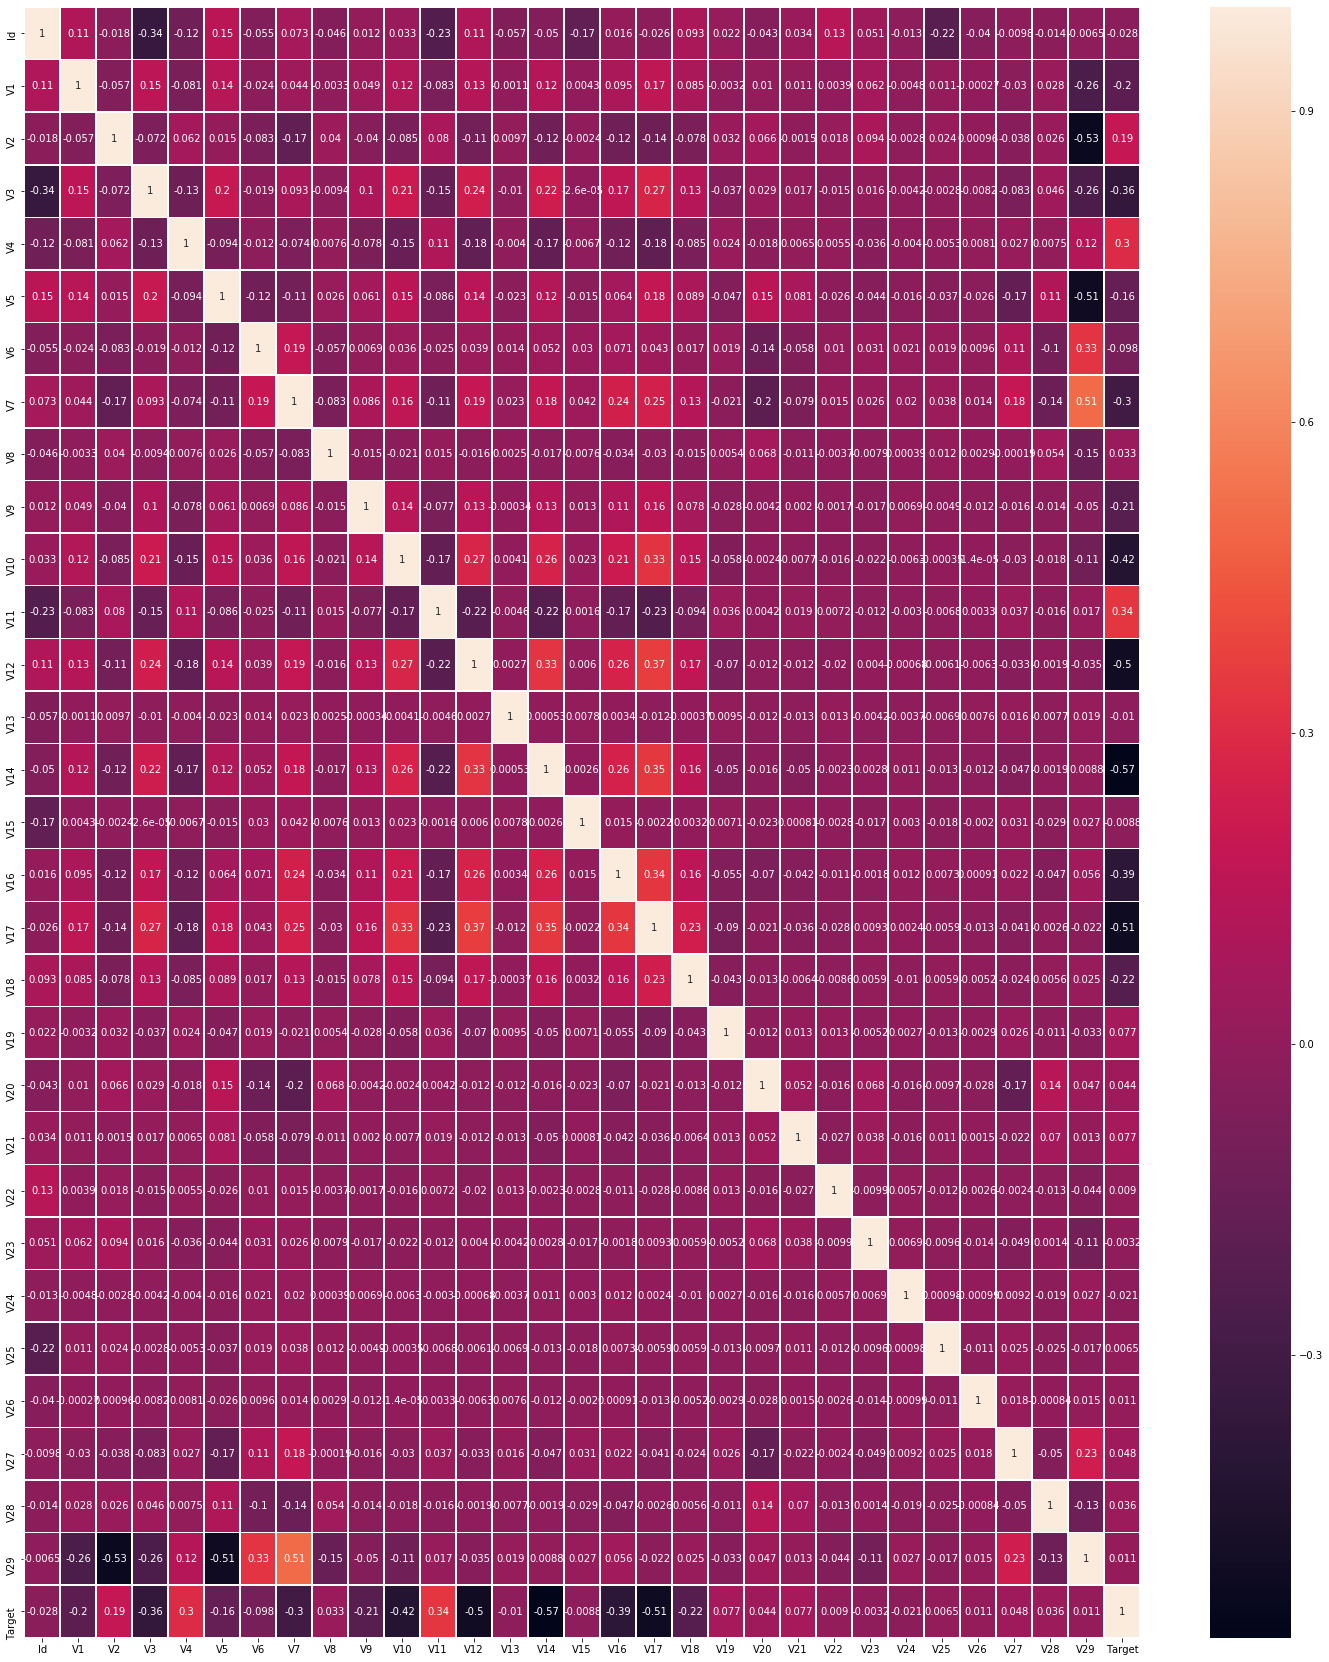

In [134]:
fig, ax = plt.subplots(figsize=(25,30))         # Sample figsize in inches
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

## Split in Test/Train

In [6]:
X_train = data.drop(['Target','Id'], axis=1)
y_train = data['Target']

X_train.shape, y_train.shape

((24846, 29), (24846,))

In [7]:
X_test=test.drop(['Id'], axis=1)
X_test.shape

(24846, 29)

## Check Explanatory Variable Types

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24846 entries, 0 to 24845
Data columns (total 31 columns):
Id        24846 non-null int64
V1        22459 non-null float64
V2        24846 non-null float64
V3        24846 non-null float64
V4        24846 non-null float64
V5        24846 non-null float64
V6        24846 non-null float64
V7        24846 non-null float64
V8        24846 non-null float64
V9        24846 non-null float64
V10       24846 non-null float64
V11       24846 non-null float64
V12       24846 non-null float64
V13       24846 non-null float64
V14       24846 non-null float64
V15       24846 non-null float64
V16       24846 non-null float64
V17       24846 non-null float64
V18       24846 non-null float64
V19       24846 non-null float64
V20       22317 non-null float64
V21       24846 non-null float64
V22       24846 non-null float64
V23       24846 non-null float64
V24       24846 non-null float64
V25       24846 non-null float64
V26       24846 non-null float64
V2

## Categorize Variables acc. to Types

In [9]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Target' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Target' and var not in discrete]

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O']

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')

There are 0 discrete variables
There are 30 continuous variables
There are 0 categorical variables


In [10]:
len(data.columns)

31

## Outliers in Continuous 

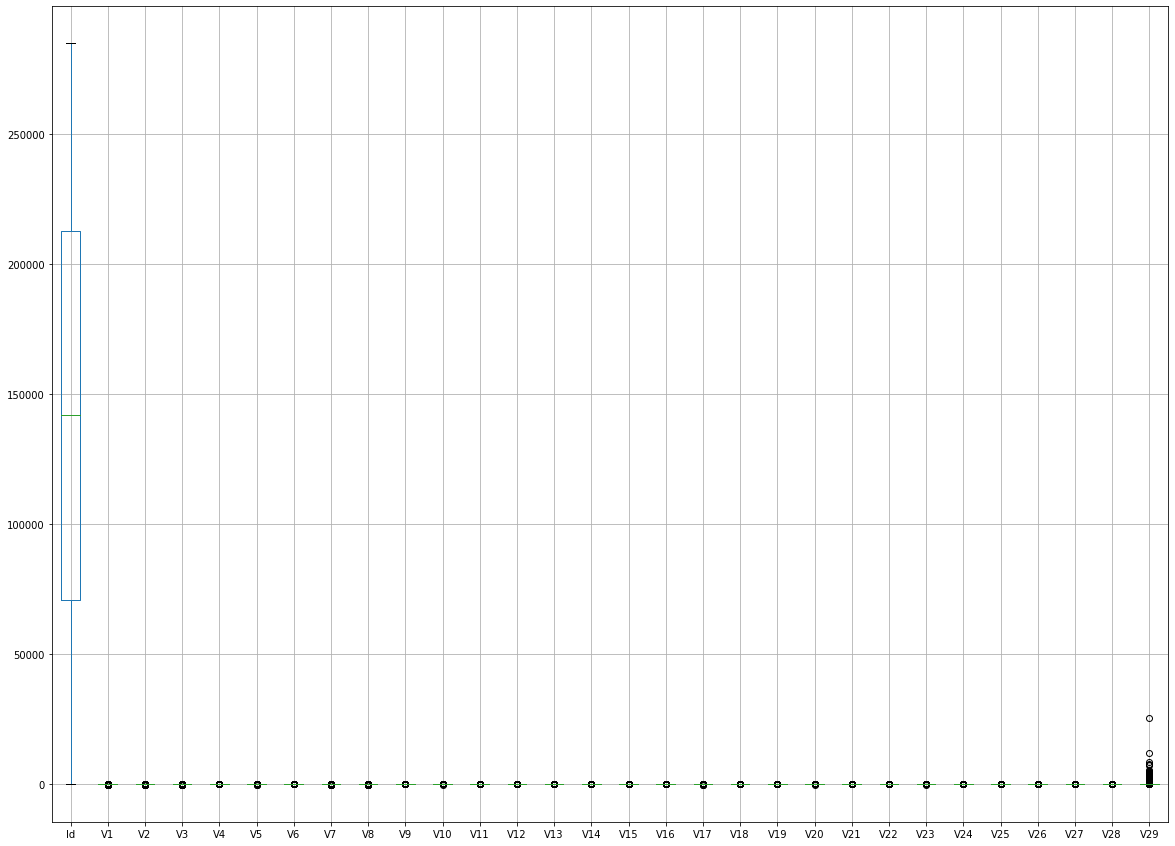

In [11]:
data[continuous].boxplot(figsize=(20,15))

## Check for Normality

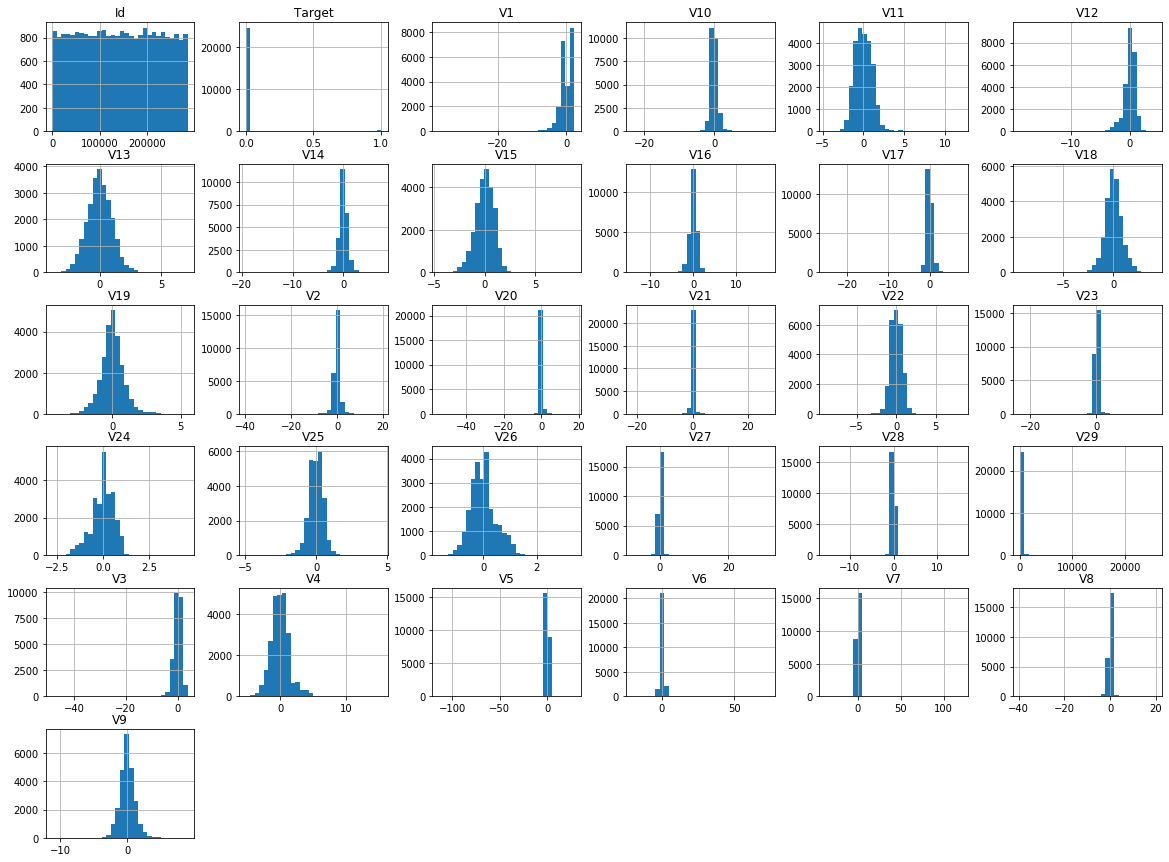

In [12]:
# numerical
data.select_dtypes(exclude='O').hist(bins=30, figsize=(20,15))
plt.show()

## Check for Null Values

In [13]:
X_train.isnull().mean()

V1     0.096072
V2     0.000000
V3     0.000000
V4     0.000000
V5     0.000000
V6     0.000000
V7     0.000000
V8     0.000000
V9     0.000000
V10    0.000000
V11    0.000000
V12    0.000000
V13    0.000000
V14    0.000000
V15    0.000000
V16    0.000000
V17    0.000000
V18    0.000000
V19    0.000000
V20    0.101787
V21    0.000000
V22    0.000000
V23    0.000000
V24    0.000000
V25    0.000000
V26    0.000000
V27    0.000000
V28    0.000000
V29    0.000000
dtype: float64

## Pre-Processing

In [14]:
# import relevant modules for feature engineering
from sklearn.pipeline import Pipeline
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from sklearn.preprocessing import StandardScaler

In [15]:
continuous=list(set(list(continuous))-set('Id'))

In [16]:
continuous.remove('Id')

In [17]:
continuous

['V6',
 'V2',
 'V13',
 'V17',
 'V21',
 'V11',
 'V20',
 'V27',
 'V8',
 'V22',
 'V24',
 'V26',
 'V10',
 'V12',
 'V16',
 'V1',
 'V7',
 'V25',
 'V15',
 'V9',
 'V19',
 'V4',
 'V23',
 'V29',
 'V18',
 'V3',
 'V5',
 'V14',
 'V28']

In [18]:
project2_preprocess = Pipeline([
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
                                          variables=continuous)),
  # feature Scaling
    ('scaler', StandardScaler())
])

In [19]:
project2_preprocess.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['V6', 'V2', 'V13', 'V17', 'V21',
                                              'V11', 'V20', 'V27', 'V8', 'V22',
                                              'V24', 'V26', 'V10', 'V12', 'V16',
                                              'V1', 'V7', 'V25', 'V15', 'V9',
                                              'V19', 'V4', 'V23', 'V29', 'V18',
                                              'V3', 'V5', 'V14', 'V28'])),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

In [20]:
# Apply Transformations
X_train=project2_preprocess.transform(X_train)
X_test=project2_preprocess.transform(X_test)

# DO NOT CHANGE STEPS BEFORE THIS POINT

## Apply Basic Models

In [21]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV

In [22]:
from sklearn.model_selection import cross_val_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer, fbeta_score

In [23]:
f2score = make_scorer(fbeta_score,beta=2)

### Logistic Regression - .80909

In [24]:
from sklearn.linear_model import LogisticRegression

param_logit = {'C': [0.001, 0.01, 0.1, 1, 10,1000],
               'solver':['lbfgs'],
              'penalty':['l2'],
              'max_iter':range(1000,1500,10)}
print("Parameter grid:\n{}".format(param_logit))

grid_logit = GridSearchCV(LogisticRegression(random_state=42), param_logit, cv=5, return_train_score=True,scoring = f2score)
grid_logit.fit(X_train, y_train)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 1000], 'solver': ['lbfgs'], 'penalty': ['l2'], 'max_iter': range(1000, 1500, 10)}


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 1000],
                         'max_iter': range(1000, 1500, 10), 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

#### Results

In [333]:
print("Best parameters: {}".format(grid_logit.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_logit.best_score_))
print('Train score: {:.4f}'.format(grid_logit.score(X_train, y_train)))

Best parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.80
Train score: 0.8177


### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree = DecisionTreeClassifier(random_state=42)

#define a list of parameters
param_dtree = {'max_depth': range(1,20)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True,scoring = f2score)
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 20)}, pre_dispatch='2*n_jobs',
  

#### Results

In [335]:
#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)
# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print('Decision Tree Train score: {:.4f}'.format(grid_dtree.score(X_train, y_train)))

Decision Tree parameters:  {'max_depth': 5}
Best Mean Cross-validation score: 0.81
Decision Tree Train score: 0.8742


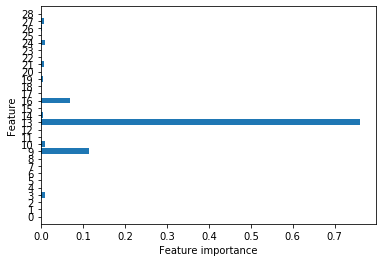

In [137]:
%matplotlib inline
def plot_feature_importances_cancer(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.best_estimator_.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.dtype.names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(grid_dtree)

### KNN - .82289

In [360]:
from sklearn.neighbors import KNeighborsClassifier

In [361]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

knn = KNeighborsClassifier()

# define a list of parameters
param_knn = {'n_neighbors': range(1,10)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True,scoring=f2score)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 10)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

#### Results

In [363]:
#find best parameters
print("KNN parameters: {}".format(grid_knn.best_params_))
# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print('Train score: {:.4f}'.format(grid_knn.score(X_train, y_train)))

KNN parameters: {'n_neighbors': 1}
Best Mean Cross-validation score: 0.83
Train score: 1.0000


### Kernel SVC

In [32]:
from sklearn.svm import SVC
param_svc = {'C':range(1,50,5), 
             'kernel':['rbf','sigmoid'],
             'gamma' :['auto']}

In [33]:
grid_svc = GridSearchCV(SVC(), param_svc, cv=5, return_train_score=True,scoring=f2score)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': range(1, 50, 5), 'gamma': ['auto'],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

#### Results

In [336]:
print("Best parameters: {}".format(grid_svc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svc.best_score_))
print('Train score: {:.4f}'.format(grid_svc.score(X_train, y_train)))

Best parameters: {'C': 21, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.73
Train score: 0.9636


### Linear SVC - .81501

In [35]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
linear_svm = LinearSVC(max_iter=3000,dual=False).fit(X_train, y_train)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (1, 29)
Intercept shape:  (1,)


In [36]:
cv_scores_linear = cross_val_score(linear_svm, X_train, y_train,scoring=f2score)

#### Results

In [337]:
print("Cross-validation scores: {}".format(cv_scores_linear))
print('Train score: {:.4f}'.format(linear_svm.score(X_train, y_train)))

Cross-validation scores: [0.78389831 0.84051724 0.75757576 0.80508475 0.84745763]
Train score: 0.9976


### Random Forest - .81352

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=0)
rfc_param = { 
    'n_estimators': range(2,15,2),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(2,15,3),
    'criterion' :['gini', 'entropy']
}

grid_rf = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, scoring =f2score)
grid_rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

#### Results

In [108]:
print(f'Best Mean Cross Validation Score is {grid_rf.best_params_}')
print(f'Best Mean Cross Validation Score is {grid_rf.best_score_}')
print(f'Train score is {grid_rf.score(X_train,y_train)}')

Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 12}
Best Mean Cross Validation Score is 0.8500952309334316
Train score is 0.8614864864864864


### Extra-Trees - .80586

In [40]:
from  sklearn.ensemble import ExtraTreesClassifier

In [41]:
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': range(50,100,10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(2,15,2),
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring = f2score)
etc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

#### Results

In [338]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')

Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'n_estimators': 50}
Best Mean Cross Validation Score is 0.8327935241589982
Train score is 0.8608990670059373


### Gradient Boost - .79684

In [43]:
from  sklearn.ensemble import GradientBoostingClassifier

In [44]:
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : range(2,15,5),
              'n_estimators' : range(50,80,10),
              'learning_rate' : [0.01,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True,scoring = f2score)
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

#### Results

In [340]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')

Best Mean Cross Validation Score is 0.7998976537815454
Best Mean Cross Validation Score is {'learning_rate': 2, 'max_depth': 12, 'n_estimators': 50}
Train score is 1.0


### XGBoost - .82116

In [46]:
from xgboost import XGBClassifier

In [47]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : range(2,15,2),
              'n_estimators' : range(50,80,10),
              'learning_rate' : [0.1,0.01],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring = f2score)
xgbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=2, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.

#### Results

In [341]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')

Best Mean Cross Validation Score is 0.8536961171789608
Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.7}
Train score is 0.867003367003367


## Cost Sensitive Models

### Logistic Regression - .80909

In [49]:
logreg = LogisticRegression(random_state=42)
param_grid = {'class_weight':['balanced','balanced_subsample'],
             'C': [0.001, 0.01, 0.1, 1, 10,1000],
               'solver':['lbfgs'],
              'penalty':['l2'],
              'max_iter':range(1000,1500,10)}# [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]}

#apply grid search
grid_CSlogreg= GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1, scoring=f2score)
grid_CSlogreg.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 1000],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'max_iter': range(1000, 1500, 10), 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             s

#### Results

In [105]:
print("Best parameters: {}".format(grid_CSlogreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_CSlogreg.best_score_))
print('Train score: {:.4f}'.format(grid_logit.score(X_train, y_train)))

Best parameters: {'C': 10, 'class_weight': 'balanced_subsample', 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Mean cross-validation score: 0.80
Train score: 0.8177


### Descision Tree - .74823

In [51]:
dtree = DecisionTreeClassifier()
param_grid = {'class_weight': ['balanced','balanced_subsample']}#[{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]}
#apply grid search
grid_CSdtree= GridSearchCV(dtree, param_grid, cv=5, n_jobs=2, scoring=f2score)
grid_CSdtree.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=2,
             param_grid={'class_weight': ['balanced', 'balanced_subsample']},
   

#### Results

In [342]:
print("Best parameters: {}".format(grid_CSdtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_CSdtree.best_score_))
print(f'Train score is {grid_CSdtree.score(X_train,y_train)}')

Best parameters: {'class_weight': 'balanced'}
Best Mean cross-validation score: 0.78
Train score is 1.0


### SVM

In [53]:
# svc = SVC()
# param_grid = {'class_weight': ['balanced','balanced_subsample']}#[{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]}

# #apply grid search
# grid_CSsvc= GridSearchCV(svc, param_grid, cv=5, n_jobs=2, scoring=f2score)
# grid_CSsvc.fit(X_train,y_train)

#### Results

In [54]:
# print("Best parameters: {}".format(grid_CSsvc.best_params_))
# print("Best Mean cross-validation score: {:.2f}".format(grid_CSsvc.best_score_))

### Random Forest - .80586

In [55]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

In [58]:
# define model
SCRandom = RandomForestClassifier(random_state=1)
SCRandom_param = {'n_estimators':range(2,10,2), 
                  'class_weight':['balanced','balanced_subsample']}

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#apply grid search
grid_CSRF= GridSearchCV(SCRandom, SCRandom_param, cv=cv, n_jobs=-1, scoring=f2score)
grid_CSRF.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                     

#### Results

In [343]:
print("Best parameters: {}".format(grid_CSRF.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_CSRF.best_score_))
print(f'Train score is {grid_CSRF.score(X_train,y_train)}')

Best parameters: {'class_weight': 'balanced', 'n_estimators': 8}
Best Mean cross-validation score: 0.79
Train score is 0.9727947238252268


### XGBoost - .83182

In [400]:
# SCxgboost = XGBClassifier()
# param_SCgrid = {'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000]}

# #apply grid search
# grid_xgboost= GridSearchCV(SCxgboost, param_SCgrid, cv=5, n_jobs=-1, scoring=f2score)
# grid_xgboost.fit(X_train,y_train)


SCxgboost = XGBClassifier()
param_SCgrid = {'scale_pos_weight': range(1000,1200,50),
               'class_weight':['balanced','balanced_subsample']}

#apply grid search
grid_xgboost= GridSearchCV(SCxgboost, param_SCgrid, cv=5, n_jobs=-1, scoring=f2score)
grid_xgboost.fit(X_train,y_train)

# SCxgboost = XGBClassifier(early_stopping_rounds=5)
# param_SCgrid = {'scale_pos_weight': range(1000,1200,50),
#                'class_weight':['balanced','balanced_subsample'],
#                'n_estimators':range(1000,1200,20),
#                'learning_rate':[0.05,0.01,0.1]}

# #apply grid search
# grid_xgboost= GridSearchCV(SCxgboost, param_SCgrid, cv=5, n_jobs=-1, scoring=f2score)
# grid_xgboost.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

#### Results

In [401]:
print("Best parameters: {}".format(grid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_xgboost.best_score_))
print(f'Train score is {grid_xgboost.score(X_train,y_train)}')

Best parameters: {'class_weight': 'balanced', 'scale_pos_weight': 1000}
Best Mean cross-validation score: 0.86
Train score is 1.0


### Extra Trees - .80586

In [62]:
#extratrees
SCExtraTree = ExtraTreesClassifier(random_state=42)
SCExtraTree_param ={'n_estimators':range(2,50,5),
                    'class_weight':['balanced','balanced_subsample']}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

grid_SCExTree= GridSearchCV(SCExtraTree, SCExtraTree_param, cv=cv, n_jobs=-1, scoring=f2score)
grid_SCExTree.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                         

#### Results

In [346]:
print("Best parameters: {}".format(grid_SCExTree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_SCExTree.best_score_))
print(f'Train score is {grid_SCExTree.score(X_train,y_train)}')

Best parameters: {'class_weight': 'balanced', 'n_estimators': 27}
Best Mean cross-validation score: 0.84
Train score is 1.0


### Bagging Decision Tree - Under Sampling

In [66]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import BaggingClassifier
from imblearn.pipeline import Pipeline
from imblearn.ensemble import BalancedBaggingClassifier

In [67]:
bag_dtree1 = Pipeline(steps=[('random',RandomUnderSampler(random_state=42)),
                             ('bagging',BalancedBaggingClassifier(base_estimator=
                                                                  DecisionTreeClassifier(class_weight='balanced'),
                                                                  random_state=42))])

bag_dtree1_param = {'bagging__n_estimators':[100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

grid_SCBagging = GridSearchCV(bag_dtree1, bag_dtree1_param,cv=cv, scoring=f2score,return_train_score=True)
grid_SCBagging.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('random',
                                        RandomUnderSampler(random_state=42,
                                                           replacement=False,
                                                           sampling_strategy='auto')),
                                       ('bagging',
                                        BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                                        class_weight='balanced',
                                                                                                        criterion='g...
                                                                  max_features=1.0,
                                               

#### Results

In [347]:
print("Best parameters: {}".format(grid_SCBagging.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_SCBagging.best_score_))
print(f'Train score is {grid_SCBagging.score(X_train,y_train)}')

Best parameters: {'bagging__n_estimators': 100}
Best Mean cross-validation score: 0.47
Train score is 0.3774752475247524


## Data Sampling

### Over Sampling

In [69]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV

#### Logistic Regression

In [71]:
# GridSearch with oversampling
pipe_logit_smote = Pipeline([('smote',SMOTE()),('Logistic',LogisticRegression(random_state=42))])

param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors': [1,2,3],
    'Logistic__C': [0.001, 0.01],
    'Logistic__solver':['lbfgs'],
    'Logistic__penalty':['l2'],
    'Logistic__max_iter':[1200]#range(1000,1500,10)
}

#apply grid search
grid_logitsmote= GridSearchCV(pipe_logit_smote, param_grid, cv=5, n_jobs=2, scoring=f2score)
grid_logitsmote.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('Logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
     

##### Results

In [348]:
print("Best parameters: {}".format(grid_logitsmote.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_logitsmote.best_score_))
print(f'Train score is {grid_logitsmote.score(X_train,y_train)}')

Best parameters: {'Logistic__C': 0.001, 'Logistic__max_iter': 1200, 'Logistic__penalty': 'l2', 'Logistic__solver': 'lbfgs', 'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.70
Train score is 0.7057340894770006


#### Decision Tree

In [73]:
#decisiontreee
pipe_ds_dtree = Pipeline([('smote',SMOTE()),('dtree',DecisionTreeClassifier(random_state=42))])
param_ds_dtree = {'smote__k_neighbors': range(2,8,2),
                 'dtree__max_depth': range(1,20,5)}

DOS_dtree= GridSearchCV(pipe_ds_dtree,param_ds_dtree, cv=5, n_jobs=2, scoring=f2score)
DOS_dtree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('dtree',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                

##### Results

In [349]:
print("Best parameters: {}".format(DOS_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(DOS_dtree.best_score_))
print(f'Train score is {DOS_dtree.score(X_train,y_train)}')

Best parameters: {'dtree__max_depth': 16, 'smote__k_neighbors': 4}
Best Mean cross-validation score: 0.74
Train score is 0.959874114870181


#### KNN - .80279

In [406]:
#knn
DOS_knn = Pipeline([('smote',SMOTE()),('knn',KNeighborsClassifier())])
param_DOS_knn = {'smote__k_neighbors': range(2,8,2),
                'knn__n_neighbors': range(1,10,2)}

DOSgrid_knn= GridSearchCV(DOS_knn,param_DOS_knn, cv=5, n_jobs=-1, scoring=f2score)
DOSgrid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
        

##### Results

In [408]:
print("Best parameters: {}".format(DOSgrid_knn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(DOSgrid_knn.best_score_))
print(f'Train score is {DOSgrid_knn.score(X_train,y_train)}')

Best parameters: {'knn__n_neighbors': 1, 'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.82
Train score is 1.0


In [411]:
test_data_labels = DOSgrid_knn.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('Project2_solution_base.csv', index =False)  
print("Done :D")

Done :D


#### SVM

In [77]:
# #svm
# DOS_svm = Pipeline([('smote',SMOTE()),('svm',SVC(random_state=42,probability=True))])
# param_DOS_svm = {'smote__k_neighbors': [1,2,3,4,5],
#                 'svm__C':[1,20,30], 
#              'svm__kernel':['rbf','sigmoid'],
#              'svm__gamma' :['auto']}

# DOSgrid_svm= GridSearchCV(DOS_svm,param_DOS_svm, cv=5, n_jobs=-1, scoring=f2score)
# DOSgrid_svm.fit(X_train, y_train)


In [78]:
# print("Best parameters: {}".format(DOSgrid_svm.best_params_))
# print("Best Mean cross-validation score: {:.2f}".format(DOSgrid_svm.best_score_))

#### Random Forest - .81395

In [79]:
#randomforest
DOS_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(random_state=42))])
param_DOS_rf = {'smote__k_neighbors': [1,2,3,4,5],
                   'rf__n_estimators': range(20,80,10),
                    'rf__max_features': ['auto', 'sqrt', 'log2'],
                    'rf__max_depth' : range(2,8,4),
                    'rf__criterion' :['gini', 'entropy']}

DOSgrid_rf= GridSearchCV(DOS_rf,param_DOS_rf, cv=5, n_jobs=-1, scoring=f2score)
DOSgrid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                            

##### Results

In [350]:
print("Best parameters: {}".format(DOSgrid_rf.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(DOSgrid_rf.best_score_))
print(f'Train score is {DOSgrid_rf.score(X_train,y_train)}')

Best parameters: {'rf__criterion': 'gini', 'rf__max_depth': 6, 'rf__max_features': 'auto', 'rf__n_estimators': 60, 'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.86
Train score is 0.9226430298146655


#### Easy Ensembler

In [81]:
#easy ensemble classifier
from imblearn.ensemble import EasyEnsembleClassifier
DOS_easy = Pipeline([('smote',SMOTE()),('easy',EasyEnsembleClassifier())])
param_DOS_easy = {'smote__k_neighbors': range(2,10,2)}

DOSgrid_easy= GridSearchCV(DOS_easy,param_DOS_easy, cv=5, n_jobs=-1, scoring=f2score)
DOSgrid_easy.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('easy',
                                        EasyEnsembleClassifier(base_estimator=None,
                                                               n_estimators=10,
                                                               n_jobs=None,
                                                               random_state=None,
                                                               replacement=False,
                                                               sampling_strategy='auto',
                                                               verbose=0,
                                          

##### Results

In [351]:
print("Best parameters: {}".format(DOSgrid_easy.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(DOSgrid_easy.best_score_))
print(f'Train score is {DOSgrid_easy.score(X_train,y_train)}')

Best parameters: {'smote__k_neighbors': 8}
Best Mean cross-validation score: 0.68
Train score is 0.6595622119815668


#### XGBoost - .79216

In [83]:
from xgboost import XGBClassifier
#xgb
DOS_xgb = Pipeline([('smote',SMOTE()),('xgboost',XGBClassifier(random_state=42,
                                                                            early_stopping_rounds=2,
#                                                                             n_estimators=100,
                                                                            objective ='binary:logistic',
#                                                                             max_depth = 4,
                                                                             ))])
param_DOS_xgb = {'smote__k_neighbors': [1,2,3,4,5],
                'xgboost__max_depth' : range(2,8,4),
                'xgboost__n_estimators' : range(50,70,20),
                'xgboost__learning_rate' : [0.1],
                'xgboost__min_child_weight' : [1,3,5,7],
                'xgboost__subsample':[0.6,0.7,0.8,0.9,1]}

DOSgrid_xgb= GridSearchCV(DOS_xgb,param_DOS_xgb, cv=3, n_jobs=-1, scoring=f2score)
DOSgrid_xgb.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('xgboost',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=2,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',

##### Results

In [352]:
print("Best parameters: {}".format(DOSgrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(DOSgrid_xgb.best_score_))
print(f'Train score is {DOSgrid_xgb.score(X_train,y_train)}')

Best parameters: {'smote__k_neighbors': 1, 'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 6, 'xgboost__min_child_weight': 5, 'xgboost__n_estimators': 50, 'xgboost__subsample': 0.8}
Best Mean cross-validation score: 0.84
Train score is 0.9345794392523363


#### Neural Network - MLP Classifier

In [152]:
from sklearn.neural_network import MLPClassifier

In [159]:
DOS_mlp = Pipeline([('smote',SMOTE()),
                    ('mlp',MLPClassifier(random_state=42))])

parameters = {'mlp__solver': ['lbfgs'], 
              'mlp__max_iter': [1200], 
              'mlp__alpha': 10.0 ** -np.arange(1, 10), 
              'mlp__hidden_layer_sizes':np.arange(10, 15), 
              'mlp__random_state':range(2,12,2)}
DOSMLPGrid = GridSearchCV(DUS_mlp, parameters,cv=5, n_jobs=-1,scoring=f2score)

DOSMLPGrid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('random',
                                        RandomUnderSampler(random_state=42,
                                                           replacement=False,
                                                           sampling_strategy='auto')),
                                       ('mlp',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(100,),
                                                      learnin

In [353]:
print("Best parameters: {}".format(DOSMLPGrid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(DOSMLPGrid.best_score_))
print(f'Train score is {DOSMLPGrid.score(X_train,y_train)}')

Best parameters: {'mlp__alpha': 0.1, 'mlp__hidden_layer_sizes': 10, 'mlp__max_iter': 1200, 'mlp__random_state': 2, 'mlp__solver': 'lbfgs'}
Best Mean cross-validation score: 0.43
Train score is 0.4450930317402408


### Under Sampling

#### Logistic Regression

In [85]:
from imblearn.under_sampling import RandomUnderSampler

In [86]:
# GridSearch with oversampling
pipe_logit_RS = Pipeline([('random',RandomUnderSampler(random_state=42)),
                             ('Logistic',LogisticRegression(random_state=42))])

param_grid = {
    # try different feature engineering parameters
    'Logistic__C': [0.001, 0.01, 0.1, 1, 10,1000],
    'Logistic__solver':['lbfgs'],
    'Logistic__penalty':['l2'],
    'Logistic__max_iter':[1200]#range(1000,1500,10)
}

#apply grid search
grid_logitRS= GridSearchCV(pipe_logit_smote, param_grid, cv=5, n_jobs=-1, scoring=f2score)
grid_logitRS.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('Logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
     

##### Results

In [354]:
print("Best parameters: {}".format(grid_logitRS.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_logitRS.best_score_))
print(f'Train score is {grid_logitRS.score(X_train,y_train)}')

Best parameters: {'Logistic__C': 0.001, 'Logistic__max_iter': 1200, 'Logistic__penalty': 'l2', 'Logistic__solver': 'lbfgs'}
Best Mean cross-validation score: 0.69
Train score is 0.7070707070707071


#### Decision Tree

In [88]:
#decisiontreee
pipe_dus_dtree = Pipeline([('random',RandomUnderSampler(random_state=42)),
                          ('dtree',DecisionTreeClassifier(random_state=42))])
param_dus_dtree = {'dtree__max_depth': range(1,20)}

DUS_dtree= GridSearchCV(pipe_dus_dtree,param_dus_dtree, cv=5, n_jobs=-1, scoring=f2score)
DUS_dtree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('random',
                                        RandomUnderSampler(random_state=42,
                                                           replacement=False,
                                                           sampling_strategy='auto')),
                                       ('dtree',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
   

##### Results

In [355]:
print("Best parameters: {}".format(DUS_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(DUS_dtree.best_score_))
print(f'Train score is {DUS_dtree.score(X_train,y_train)}')

Best parameters: {'dtree__max_depth': 1}
Best Mean cross-validation score: 0.51
Train score is 0.5549654806160383


#### KNN

In [404]:
#knn
DUS_knn = Pipeline([('random',RandomUnderSampler(random_state=42)),
                    ('knn',KNeighborsClassifier())])
param_DUS_knn = {'knn__n_neighbors': range(1,10)}

DUSgrid_knn= GridSearchCV(DUS_knn,param_DUS_knn, cv=5, n_jobs=-1, scoring=f2score)
DUSgrid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('random',
                                        RandomUnderSampler(random_state=42,
                                                           replacement=False,
                                                           sampling_strategy='auto')),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                           

##### Results

In [405]:
print("Best parameters: {}".format(DUSgrid_knn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(DUSgrid_knn.best_score_))

Best parameters: {'knn__n_neighbors': 8}
Best Mean cross-validation score: 0.72


#### SVM

In [92]:
# #svm
# DUS_svm = Pipeline([('random',RandomUnderSampler(random_state=42)),
#                     ('svm',SVC(random_state=42))])
# param_DUS_svm = {'svm__C':[1,20,30], 
#                  'svm__kernel':['rbf','sigmoid'],
#                  'svm__gamma' :['auto']}

# DUSgrid_svm= GridSearchCV(DUS_svm,param_DUS_svm, cv=5, n_jobs=-1, scoring=f2score)
# DUSgrid_svm.fit(X_train, y_train)

In [93]:
# print("Best parameters: {}".format(DUSgrid_svm.best_params_))
# print("Best Mean cross-validation score: {:.2f}".format(DUSgrid_svm.best_score_))

#### Random Forest - .76518

In [143]:
#randomforest
DUS_rf = Pipeline([('random',RandomUnderSampler(random_state=42)),
                   ('rf',RandomForestClassifier(random_state=42))])
param_DUS_rf = {'rf__n_estimators': range(20,100,10),
                    'rf__max_features': ['auto', 'sqrt', 'log2'],
                    'rf__max_depth' : range(2,15,4),
                    'rf__criterion' :['gini', 'entropy']}

DUSgrid_rf= GridSearchCV(DUS_rf,param_DUS_rf, cv=5, n_jobs=-1, scoring=f2score)
DUSgrid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('random',
                                        RandomUnderSampler(random_state=42,
                                                           replacement=False,
                                                           sampling_strategy='auto')),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
               

##### Results

In [356]:
print("Best parameters: {}".format(DUSgrid_rf.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(DUSgrid_rf.best_score_))
print(f'Train score is {DUSgrid_rf.score(X_train,y_train)}')

Best parameters: {'rf__criterion': 'gini', 'rf__max_depth': 2, 'rf__max_features': 'auto', 'rf__n_estimators': 90}
Best Mean cross-validation score: 0.82
Train score is 0.8154670750382847


#### Easy Ensembler

In [96]:
#easy ensemble classifier
from imblearn.ensemble import EasyEnsembleClassifier
DUS_easy = Pipeline([('random',RandomUnderSampler()),
                     ('easy',EasyEnsembleClassifier())])
param_DUS_easy = {'easy__n_estimators':range(2,50,5)}

DUSgrid_easy= GridSearchCV(DUS_easy,param_DUS_easy, cv=5, n_jobs=-1, scoring=f2score)
DUSgrid_easy.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('random',
                                        RandomUnderSampler(random_state=None,
                                                           replacement=False,
                                                           sampling_strategy='auto')),
                                       ('easy',
                                        EasyEnsembleClassifier(base_estimator=None,
                                                               n_estimators=10,
                                                               n_jobs=None,
                                                               random_state=None,
                                                               replacement=False,
                                                               sampling_strategy='auto',
                                                               verbose=0,
           

##### Results

In [357]:
print("Best parameters: {}".format(DUSgrid_easy.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(DUSgrid_easy.best_score_))
print(f'Train score is {DUSgrid_easy.score(X_train,y_train)}')

Best parameters: {'easy__n_estimators': 37}
Best Mean cross-validation score: 0.46
Train score is 0.5091819699499165


#### XGBoost

In [98]:
#xgb
DUS_xgb = Pipeline([('random',RandomUnderSampler(random_state=42)),
                    ('xgboost',XGBClassifier(random_state=42,
                                            early_stopping_rounds=2,
                                            objective ='binary:logistic',
                                             ))])
param_DUS_xgb = {'xgboost__max_depth' : range(2,8,2),
                'xgboost__n_estimators' : range(50,80,20),
                'xgboost__learning_rate' : [0.1],
                'xgboost__min_child_weight' : [1,3,5,7],
                'xgboost__subsample':[0.6,0.7,0.8,0.9,1]}

DUSgrid_xgb= GridSearchCV(DUS_xgb,param_DUS_xgb, cv=5, n_jobs=-1, scoring=f2score)
DUSgrid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('random',
                                        RandomUnderSampler(random_state=42,
                                                           replacement=False,
                                                           sampling_strategy='auto')),
                                       ('xgboost',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=2,
                                                      gamma=None, gpu_id=None,
                                                

##### Results

In [358]:
print("Best parameters: {}".format(DUSgrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(DUSgrid_xgb.best_score_))
print(f'Train score is {DUSgrid_xgb.score(X_train,y_train)}')

Best parameters: {'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 4, 'xgboost__min_child_weight': 7, 'xgboost__n_estimators': 50, 'xgboost__subsample': 0.6}
Best Mean cross-validation score: 0.59
Train score is 0.5963791267305645


## Neural Network - MLP Classifier

In [146]:
from sklearn.neural_network import MLPClassifier

In [157]:
DUS_mlp = Pipeline([('random',RandomUnderSampler(random_state=42)),
                    ('mlp',MLPClassifier(random_state=42))])

parameters = {'mlp__solver': ['lbfgs'], 
              'mlp__max_iter': [1200], 
              'mlp__alpha': 10.0 ** -np.arange(1, 10), 
              'mlp__hidden_layer_sizes':np.arange(10, 15), 
              'mlp__random_state':range(2,12,2)}
MLPGrid = GridSearchCV(DUS_mlp, parameters,cv=5, n_jobs=-1,scoring=f2score)

MLPGrid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('random',
                                        RandomUnderSampler(random_state=42,
                                                           replacement=False,
                                                           sampling_strategy='auto')),
                                       ('mlp',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(100,),
                                                      learnin

In [359]:
print("Best parameters: {}".format(MLPGrid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(MLPGrid.best_score_))
print(f'Train score is {MLPGrid.score(X_train,y_train)}')

Best parameters: {'mlp__alpha': 0.1, 'mlp__hidden_layer_sizes': 10, 'mlp__max_iter': 1200, 'mlp__random_state': 2, 'mlp__solver': 'lbfgs'}
Best Mean cross-validation score: 0.43
Train score is 0.4450930317402408


## Stacking

# Summary

In [195]:
classifiers={ 
'Logistic':grid_logit,
'DecisionTree':grid_dtree,
'Kernel SVC':grid_svc,
'RF':grid_rf,
'Extra Trees':etc_grid,
'Gradient Boost':gbc_grid,
'XGBoost':xgbc_grid,
'CS Logit':grid_CSlogreg,
'CS DTree':grid_CSdtree,
# 'CS RF':SCRandom_param,
'CS XGBoost':grid_xgboost,
'CS Extra Tree':grid_SCExTree,
'CS Bagging D Tree':grid_SCBagging,
'Over logit':grid_logitsmote,
'Over DTree':DOS_dtree,
'Over RF':DOSgrid_rf,
'Over Easy':DOSgrid_easy,
'Over XGboost':DOSgrid_xgb,
'Over MLP':DOSMLPGrid,
'Under Logit':grid_logitRS,
'Under Decision Tree': DUS_dtree,
'Under RF':DUSgrid_rf,
'Under Easy':DUSgrid_easy,
'Under XGboost':DUSgrid_xgb,
'Under MLP':MLPGrid
}

In [196]:
classifiers.keys()

dict_keys(['Logistic', 'DecisionTree', 'Kernel SVC', 'RF', 'Extra Trees', 'Gradient Boost', 'XGBoost', 'CS Logit', 'CS DTree', 'CS XGBoost', 'CS Extra Tree', 'CS Bagging D Tree', 'Over logit', 'Over DTree', 'Over RF', 'Over Easy', 'Over XGboost', 'Over MLP', 'Under Logit', 'Under Decision Tree', 'Under RF', 'Under Easy', 'Under XGboost', 'Under MLP'])

In [197]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [198]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])


In [199]:
# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
9,CS XGBoost,0.863311,0.046246
14,Over RF,0.861917,0.034663
6,XGBoost,0.853696,0.048157
3,RF,0.850095,0.055296
10,CS Extra Tree,0.842084,0.049814
16,Over XGboost,0.838657,0.050082
4,Extra Trees,0.832794,0.053444
20,Under RF,0.821151,0.029584
1,DecisionTree,0.814990,0.056385
0,Logistic,0.800555,0.027454


In [200]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_test)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [201]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

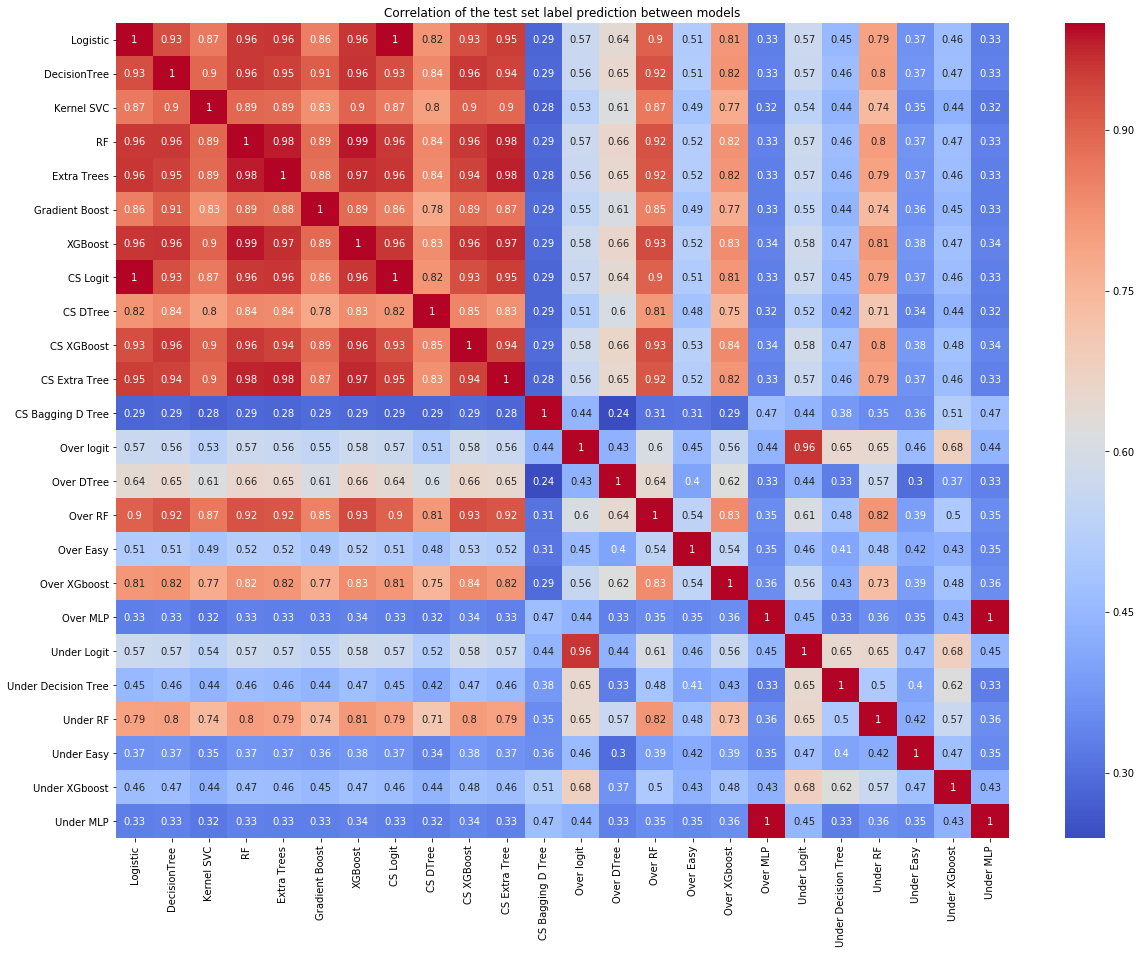

In [206]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,15))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [207]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]



In [209]:
print("Top Least Correlations")
print(get_top_abs_correlations(pred, 7))

Top Least Correlations
CS Bagging D Tree  Over DTree           0.238920
Kernel SVC         CS Bagging D Tree    0.276968
CS Extra Tree      CS Bagging D Tree    0.284768
Extra Trees        CS Bagging D Tree    0.284895
CS DTree           CS Bagging D Tree    0.285106
Logistic           CS Bagging D Tree    0.286314
CS Logit           CS Bagging D Tree    0.286314
dtype: float64


## Voting top 5

In [211]:
from sklearn.ensemble import VotingClassifier

In [212]:
vclf1 = VotingClassifier(estimators=
                              [('CS XGBoost', grid_xgboost.best_estimator_), 
                               ('Over RF', DOSgrid_rf.best_estimator_), 
                               ('XGBoost', xgbc_grid.best_estimator_),
                               ('RF', grid_rf.best_estimator_),
                               ('CS Extra Tree', grid_SCExTree.best_estimator_),
                               ('Over XGboost', DOSgrid_xgb.best_estimator_),
                               ('Extra Trees', etc_grid.best_estimator_),
                              ] )
vclf1_param = {'voting' : ['hard','soft']}
vclf1_grid = GridSearchCV(vclf1, vclf1_param,cv=5,n_jobs=-1, return_train_score=True,scoring=f2score)
vclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('CS XGBoost',
                                                     XGBClassifier(base_score=0.5,
                                                                   booster=None,
                                                                   colsample_bylevel=1,
                                                                   colsample_bynode=1,
                                                                   colsample_bytree=1,
                                                                   gamma=0,
                                                                   gpu_id=-1,
                                                                   importance_type='gain',
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.300000012,
                                   

### Results

In [213]:
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')

Best Mean Cross Validation Score is 0.8599431114386332
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.940347970173985


## Stacking Top 5

https://towardsdatascience.com/stacking-made-easy-with-sklearn-e27a0793c92b

In [217]:
from sklearn.ensemble import StackingClassifier

### Combination 1 - .81352

In [222]:
sclf1 = StackingClassifier(estimators=
                             [('CS XGBoost', grid_xgboost.best_estimator_), 
                               ('Over RF', DOSgrid_rf.best_estimator_), 
                               ('XGBoost', xgbc_grid.best_estimator_),
                               ('RF', grid_rf.best_estimator_),
                               ('CS Extra Tree', grid_SCExTree.best_estimator_),
                               ('Over XGboost', DOSgrid_xgb.best_estimator_),
                               ('Extra Trees', etc_grid.best_estimator_),
                              ] , final_estimator=LogisticRegression(
    multi_class="multinomial",solver="lbfgs", C=30))

sclf1_param = {
                'final_estimator__C': [0.001, 0.01, 0.1, 1, 10,1000],
                'final_estimator__penalty':['l2'],
                'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True,n_jobs=-1,scoring=f2score )
sclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('CS XGBoost',
                                                       XGBClassifier(base_score=0.5,
                                                                     booster=None,
                                                                     colsample_bylevel=1,
                                                                     colsample_bynode=1,
                                                                     colsample_bytree=1,
                                                                     gamma=0,
                                                                     gpu_id=-1,
                                                                     importance_type='gain',
                                                                     interaction_constraints=None,
                                                          

In [223]:
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')

Best Mean Cross Validation Score is 0.8478698044874516
Best Mean Cross Validation Score is {'final_estimator__C': 1, 'final_estimator__penalty': 'l2', 'stack_method': 'auto'}
Train score is 0.9835390946502058


### Combination 2 -.81352

In [225]:
sclf2 = StackingClassifier(estimators=
                             [('CS XGBoost', grid_xgboost.best_estimator_), 
                               ('Over RF', DOSgrid_rf.best_estimator_), 
                               ('XGBoost', xgbc_grid.best_estimator_),
                               ('RF', grid_rf.best_estimator_),
                               ('CS Extra Tree', grid_SCExTree.best_estimator_),
                               ('Over XGboost', DOSgrid_xgb.best_estimator_),
                               ('Extra Trees', etc_grid.best_estimator_),
                              ] , final_estimator=sclf1_grid.best_estimator_)

sclf2_param = {
#                 'final_estimator__C': [0.001, 0.01, 0.1, 1, 10,1000],
#                 'final_estimator__penalty':['l2'],
                'stack_method':['auto', 'predict_proba']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True,scoring=f2score)
sclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('CS XGBoost',
                                                       XGBClassifier(base_score=0.5,
                                                                     booster=None,
                                                                     colsample_bylevel=1,
                                                                     colsample_bynode=1,
                                                                     colsample_bytree=1,
                                                                     gamma=0,
                                                                     gpu_id=-1,
                                                                     importance_type='gain',
                                                                     interaction_constraints=None,
                                                          

In [226]:
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')

Best Mean Cross Validation Score is 0.8595398428731761
Best Mean Cross Validation Score is {'stack_method': 'auto'}
Train score is 0.9535655058043118


### Combination 3 - .81204

In [227]:
sclf3 = StackingClassifier(estimators=
                             [('CS XGBoost', grid_xgboost.best_estimator_), 
                               ('Over RF', DOSgrid_rf.best_estimator_), 
                               ('XGBoost', xgbc_grid.best_estimator_),
                               ('RF', grid_rf.best_estimator_),
                               ('CS Extra Tree', grid_SCExTree.best_estimator_),
                               ('Over XGboost', DOSgrid_xgb.best_estimator_),
                               ('Extra Trees', etc_grid.best_estimator_),
                              ] , final_estimator=sclf2_grid.best_estimator_)

sclf3_param = {
#                 'final_estimator__C': [0.001, 0.01, 0.1, 1, 10,1000],
#                 'final_estimator__penalty':['l2'],
                'stack_method':['auto', 'predict_proba']
             }
sclf3_grid = GridSearchCV(sclf3, sclf3_param,cv=5, return_train_score=True )
sclf3_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('CS XGBoost',
                                                       XGBClassifier(base_score=0.5,
                                                                     booster=None,
                                                                     colsample_bylevel=1,
                                                                     colsample_bynode=1,
                                                                     colsample_bytree=1,
                                                                     gamma=0,
                                                                     gpu_id=-1,
                                                                     importance_type='gain',
                                                                     interaction_constraints=None,
                                                          

In [382]:
print(f'Best Mean Cross Validation Score is {sclf3_grid.best_score_}')
print(f'Best Parameters are {sclf3_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')

Best Mean Cross Validation Score is 0.9978266297321057
Best Parameters are {'stack_method': 'auto'}
Train score is 0.9535655058043118


## Other Methods

### RandomizedSearchCV with Random Forest

In [234]:
from sklearn.model_selection import RandomizedSearchCV

In [235]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=0)
rfc_param = { 
    'n_estimators': range(2,15,2),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(2,15,3),
    'criterion' :['gini', 'entropy']
}

rsearchcv_rf = RandomizedSearchCV(rfc, rfc_param,cv=5, return_train_score=True, scoring =f2score)
rsearchcv_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

#### Results

In [236]:
print(f'Best Mean Cross Validation Score is {rsearchcv_rf.best_params_}')
print(f'Best Mean Cross Validation Score is {rsearchcv_rf.best_score_}')
print(f'Train score is {rsearchcv_rf.score(X_train,y_train)}')

Best Mean Cross Validation Score is {'n_estimators': 12, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'gini'}
Best Mean Cross Validation Score is 0.8415861898736801
Train score is 0.871404399323181


### CatBoost Classifier - .81352

In [239]:
#pip install catboost

In [243]:
from catboost import CatBoostClassifier

In [308]:
catb = CatBoostClassifier()

catb_param = {'learning_rate': [0.03, 0.1],
                'depth': range(2,10,2),
                'l2_leaf_reg': range(2,10,2)}

catb_grid = GridSearchCV(catb, catb_param,cv=5,n_jobs=-1, return_train_score=True, scoring =f2score)
catb_grid.fit(X_train,y_train)

0:	learn: 0.6074288	total: 74.3ms	remaining: 1m 14s
1:	learn: 0.5308762	total: 88ms	remaining: 43.9s
2:	learn: 0.4647003	total: 98.8ms	remaining: 32.8s
3:	learn: 0.4103385	total: 110ms	remaining: 27.4s
4:	learn: 0.3589659	total: 122ms	remaining: 24.3s
5:	learn: 0.3156362	total: 133ms	remaining: 22.1s
6:	learn: 0.2759750	total: 146ms	remaining: 20.6s
7:	learn: 0.2440715	total: 159ms	remaining: 19.7s
8:	learn: 0.2144962	total: 171ms	remaining: 18.8s
9:	learn: 0.1885638	total: 182ms	remaining: 18s
10:	learn: 0.1670417	total: 196ms	remaining: 17.6s
11:	learn: 0.1476058	total: 208ms	remaining: 17.1s
12:	learn: 0.1331938	total: 220ms	remaining: 16.7s
13:	learn: 0.1190247	total: 233ms	remaining: 16.4s
14:	learn: 0.1061889	total: 245ms	remaining: 16.1s
15:	learn: 0.0950364	total: 259ms	remaining: 15.9s
16:	learn: 0.0854880	total: 273ms	remaining: 15.8s
17:	learn: 0.0770394	total: 286ms	remaining: 15.6s
18:	learn: 0.0698292	total: 297ms	remaining: 15.3s
19:	learn: 0.0635772	total: 309ms	remaini

168:	learn: 0.0090040	total: 2.46s	remaining: 12.1s
169:	learn: 0.0089861	total: 2.47s	remaining: 12.1s
170:	learn: 0.0089605	total: 2.48s	remaining: 12s
171:	learn: 0.0089486	total: 2.5s	remaining: 12s
172:	learn: 0.0089447	total: 2.51s	remaining: 12s
173:	learn: 0.0089322	total: 2.52s	remaining: 12s
174:	learn: 0.0089241	total: 2.54s	remaining: 12s
175:	learn: 0.0089140	total: 2.55s	remaining: 11.9s
176:	learn: 0.0089126	total: 2.56s	remaining: 11.9s
177:	learn: 0.0088983	total: 2.58s	remaining: 11.9s
178:	learn: 0.0088824	total: 2.59s	remaining: 11.9s
179:	learn: 0.0088689	total: 2.6s	remaining: 11.8s
180:	learn: 0.0088522	total: 2.61s	remaining: 11.8s
181:	learn: 0.0088281	total: 2.63s	remaining: 11.8s
182:	learn: 0.0088197	total: 2.64s	remaining: 11.8s
183:	learn: 0.0087891	total: 2.65s	remaining: 11.8s
184:	learn: 0.0087813	total: 2.67s	remaining: 11.7s
185:	learn: 0.0087796	total: 2.68s	remaining: 11.7s
186:	learn: 0.0087594	total: 2.69s	remaining: 11.7s
187:	learn: 0.0087363	to

338:	learn: 0.0071651	total: 4.62s	remaining: 9s
339:	learn: 0.0071602	total: 4.63s	remaining: 8.99s
340:	learn: 0.0071519	total: 4.65s	remaining: 8.98s
341:	learn: 0.0071455	total: 4.66s	remaining: 8.97s
342:	learn: 0.0071431	total: 4.67s	remaining: 8.95s
343:	learn: 0.0071150	total: 4.69s	remaining: 8.95s
344:	learn: 0.0071076	total: 4.7s	remaining: 8.93s
345:	learn: 0.0070949	total: 4.71s	remaining: 8.91s
346:	learn: 0.0070879	total: 4.73s	remaining: 8.9s
347:	learn: 0.0070675	total: 4.74s	remaining: 8.88s
348:	learn: 0.0070584	total: 4.75s	remaining: 8.87s
349:	learn: 0.0070539	total: 4.77s	remaining: 8.85s
350:	learn: 0.0070492	total: 4.78s	remaining: 8.84s
351:	learn: 0.0070428	total: 4.79s	remaining: 8.83s
352:	learn: 0.0070359	total: 4.81s	remaining: 8.81s
353:	learn: 0.0070294	total: 4.82s	remaining: 8.79s
354:	learn: 0.0070205	total: 4.84s	remaining: 8.79s
355:	learn: 0.0070182	total: 4.85s	remaining: 8.77s
356:	learn: 0.0069984	total: 4.86s	remaining: 8.76s
357:	learn: 0.006

498:	learn: 0.0060208	total: 6.81s	remaining: 6.84s
499:	learn: 0.0060145	total: 6.83s	remaining: 6.83s
500:	learn: 0.0060102	total: 6.84s	remaining: 6.82s
501:	learn: 0.0059963	total: 6.85s	remaining: 6.8s
502:	learn: 0.0059940	total: 6.86s	remaining: 6.78s
503:	learn: 0.0059917	total: 6.88s	remaining: 6.78s
504:	learn: 0.0059871	total: 6.89s	remaining: 6.76s
505:	learn: 0.0059849	total: 6.91s	remaining: 6.75s
506:	learn: 0.0059834	total: 6.92s	remaining: 6.73s
507:	learn: 0.0059728	total: 6.93s	remaining: 6.71s
508:	learn: 0.0059687	total: 6.95s	remaining: 6.7s
509:	learn: 0.0059578	total: 6.96s	remaining: 6.68s
510:	learn: 0.0059532	total: 6.97s	remaining: 6.67s
511:	learn: 0.0059510	total: 6.98s	remaining: 6.65s
512:	learn: 0.0059496	total: 7s	remaining: 6.64s
513:	learn: 0.0059443	total: 7.01s	remaining: 6.63s
514:	learn: 0.0059402	total: 7.02s	remaining: 6.61s
515:	learn: 0.0059368	total: 7.03s	remaining: 6.6s
516:	learn: 0.0059346	total: 7.05s	remaining: 6.59s
517:	learn: 0.0059

664:	learn: 0.0052045	total: 8.79s	remaining: 4.43s
665:	learn: 0.0051997	total: 8.8s	remaining: 4.42s
666:	learn: 0.0051959	total: 8.82s	remaining: 4.4s
667:	learn: 0.0051922	total: 8.83s	remaining: 4.39s
668:	learn: 0.0051909	total: 8.84s	remaining: 4.37s
669:	learn: 0.0051892	total: 8.85s	remaining: 4.36s
670:	learn: 0.0051876	total: 8.86s	remaining: 4.34s
671:	learn: 0.0051822	total: 8.87s	remaining: 4.33s
672:	learn: 0.0051695	total: 8.88s	remaining: 4.32s
673:	learn: 0.0051659	total: 8.9s	remaining: 4.3s
674:	learn: 0.0051645	total: 8.91s	remaining: 4.29s
675:	learn: 0.0051609	total: 8.92s	remaining: 4.27s
676:	learn: 0.0051547	total: 8.93s	remaining: 4.26s
677:	learn: 0.0051534	total: 8.94s	remaining: 4.25s
678:	learn: 0.0051486	total: 8.95s	remaining: 4.23s
679:	learn: 0.0051473	total: 8.97s	remaining: 4.22s
680:	learn: 0.0051431	total: 8.98s	remaining: 4.21s
681:	learn: 0.0051410	total: 8.99s	remaining: 4.19s
682:	learn: 0.0051372	total: 9s	remaining: 4.18s
683:	learn: 0.00513

829:	learn: 0.0045620	total: 10.8s	remaining: 2.21s
830:	learn: 0.0045598	total: 10.8s	remaining: 2.19s
831:	learn: 0.0045547	total: 10.8s	remaining: 2.18s
832:	learn: 0.0045528	total: 10.8s	remaining: 2.17s
833:	learn: 0.0045466	total: 10.8s	remaining: 2.15s
834:	learn: 0.0045446	total: 10.8s	remaining: 2.14s
835:	learn: 0.0045427	total: 10.8s	remaining: 2.13s
836:	learn: 0.0045403	total: 10.9s	remaining: 2.11s
837:	learn: 0.0045289	total: 10.9s	remaining: 2.1s
838:	learn: 0.0045243	total: 10.9s	remaining: 2.09s
839:	learn: 0.0045109	total: 10.9s	remaining: 2.07s
840:	learn: 0.0045073	total: 10.9s	remaining: 2.06s
841:	learn: 0.0045030	total: 10.9s	remaining: 2.05s
842:	learn: 0.0045021	total: 10.9s	remaining: 2.04s
843:	learn: 0.0045012	total: 10.9s	remaining: 2.02s
844:	learn: 0.0044950	total: 11s	remaining: 2.01s
845:	learn: 0.0044932	total: 11s	remaining: 2s
846:	learn: 0.0044913	total: 11s	remaining: 1.99s
847:	learn: 0.0044895	total: 11s	remaining: 1.97s
848:	learn: 0.0044877	to

993:	learn: 0.0040536	total: 12.9s	remaining: 78.1ms
994:	learn: 0.0040523	total: 13s	remaining: 65.2ms
995:	learn: 0.0040511	total: 13s	remaining: 52.2ms
996:	learn: 0.0040485	total: 13s	remaining: 39.1ms
997:	learn: 0.0040462	total: 13s	remaining: 26.1ms
998:	learn: 0.0040319	total: 13s	remaining: 13ms
999:	learn: 0.0040296	total: 13.1s	remaining: 0us


GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000025775ED1CC8>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': range(2, 10, 2),
                         'l2_leaf_reg': range(2, 10, 2),
                         'learning_rate': [0.03, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [313]:
print(f'Best Mean Cross Validation Score is {catb_grid.best_params_}')
print(f'Best Mean Cross Validation Score is {catb_grid.best_score_}')
print(f'Train score is {catb_grid.score(X_train,y_train)}')

Best Mean Cross Validation Score is {'depth': 4, 'l2_leaf_reg': 6, 'learning_rate': 0.03}
Best Mean Cross Validation Score is 0.8564556204653645
Train score is 0.9181969949916529


### LightGBM Classifier - .79816

In [310]:
#pip install lightgbm

In [248]:
from lightgbm import LGBMClassifier

In [311]:
lgbm = LGBMClassifier()
param_lgbm = {
    'n_estimators': range(50,70,10),
    'colsample_bytree': [0.7, 0.8],
    'max_depth': range(2,10,5),
    'num_leaves': range(2,10,2),
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

grid_lgbm = GridSearchCV(lgbm, param_lgbm,cv=5,n_jobs=-1, return_train_score=True, scoring =f2score)
grid_lgbm.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=Tru...
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'max_depth': range(2, 10, 5),
                         'min_split_gain': [0.3, 0.4],
                         'n_estimators': range(50, 70, 10),
                         'num_leaves': range(2

In [312]:
print(f'Best Mean Cross Validation Score is {grid_lgbm.best_params_}')
print(f'Best Mean Cross Validation Score is {grid_lgbm.best_score_}')
print(f'Train score is {grid_lgbm.score(X_train,y_train)}')

Best Mean Cross Validation Score is {'colsample_bytree': 0.7, 'max_depth': 7, 'min_split_gain': 0.4, 'n_estimators': 60, 'num_leaves': 8, 'reg_alpha': 1.3, 'reg_lambda': 1.3, 'subsample': 0.9, 'subsample_freq': 20}
Best Mean Cross Validation Score is 0.8398943998871164
Train score is 0.8912133891213391


### One Class Classification for imbalanced data (Isolation forest)

In [253]:
from sklearn.ensemble import IsolationForest

In [273]:
f2score2 = make_scorer(fbeta_score,beta=2,average='macro')#[None, 'micro', 'macro', 'weighted']

In [274]:
isoforest = IsolationForest(random_state=42)
iso_param = {
    'n_estimators':range(10,60,10),
    'max_samples':['auto'],
    'contamination':['auto']
}
grid_iso = GridSearchCV(isoforest, iso_param,cv=5,n_jobs=-1, return_train_score=True, scoring =f2score2)
grid_iso.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=IsolationForest(behaviour='deprecated', bootstrap=False,
                                       contamination='auto', max_features=1.0,
                                       max_samples='auto', n_estimators=100,
                                       n_jobs=None, random_state=42, verbose=0,
                                       warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'contamination': ['auto'], 'max_samples': ['auto'],
                         'n_estimators': range(10, 60, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2, average=macro),
             verbose=0)

In [275]:
print(f'Best Mean Cross Validation Score is {grid_iso.best_params_}')
print(f'Best Mean Cross Validation Score is {grid_iso.best_score_}')
print(f'Train score is {grid_iso.score(X_train,y_train)}')

Best Mean Cross Validation Score is {'contamination': 'auto', 'max_samples': 'auto', 'n_estimators': 30}
Best Mean Cross Validation Score is 0.003558269018006486
Train score is 0.0031987205117952823


### Naive Bayes

In [284]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

#### GaussianNB - .79670

In [304]:
naiveGaussian = GaussianNB()
naive_param = {}
grid_naiveGB = GridSearchCV(naivebayes, naive_param,cv=5,n_jobs=-1, return_train_score=True, scoring =f2score2)
grid_naiveGB.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=-1, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2, average=macro),
             verbose=0)

In [305]:
print(f'Best Mean Cross Validation Score is {grid_naiveGB.best_params_}')
print(f'Best Mean Cross Validation Score is {grid_naiveGB.best_score_}')
print(f'Train score is {grid_naiveGB.score(X_train,y_train)}')

Best Mean Cross Validation Score is {}
Best Mean Cross Validation Score is 0.8851045876061363
Train score is 0.8873985829077566


#### BernoulliNB - .79670

In [318]:
naivebernoulli = BernoulliNB()
naive_param = {}
grid_naiveber = GridSearchCV(naivebernoulli, naive_param,cv=5,n_jobs=-1, return_train_score=True, scoring =f2score2)
grid_naiveber.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=-1, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2, average=macro),
             verbose=0)

In [320]:
print(f'Best Mean Cross Validation Score is {grid_naiveber.best_params_}')
print(f'Best Mean Cross Validation Score is {grid_naiveber.best_score_}')
print(f'Train score is {grid_naiveber.score(X_train,y_train)}')

Best Mean Cross Validation Score is {}
Best Mean Cross Validation Score is 0.8851045876061363
Train score is 0.8873985829077566


# Saving and Restoring Model

In [377]:
import pickle

In [378]:
# save the model to disk
filename = 'XGBoost_Cost_Sensitive.sav'
pickle.dump(grid_xgboost, open(filename, 'wb'))

In [379]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [380]:
loaded_model

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': ['balanced'

# The End